# Réduction d'une forêt aléatoire avec une régression Lasso

Le modèle Lasso permet de sélectionner des variables, une forêt aléatoire produit une prédiction comme étant la moyenne d'arbres de régression. Et si on mélangeait les deux ?

## Librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Données

On va partir sur ce jeu de données [California](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html). Le but est de prédire le prix des appartements (variable *MedHouseVal* pour Median Value en unités 100 000$). Importer les données puis afficher l'objet dataset importé, notamment l'attribut `DESCR`.

In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

## Analyse exploratoire et visualisation

Créer un dataframe à partir des données du jeu California puis procéder à l'étape de visualisation et d'analyse exploratoire. Regarder notamment les corrélations et afficher des graphiques des variables indépendantes fortement corrélées avec la variable dépendante.

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target
df.head(15)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


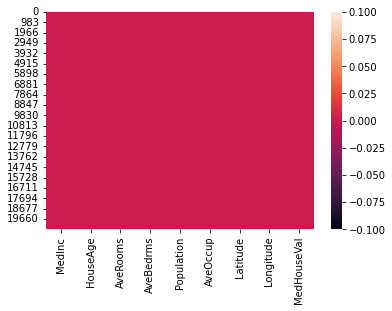

In [7]:
sns.heatmap(df==0);

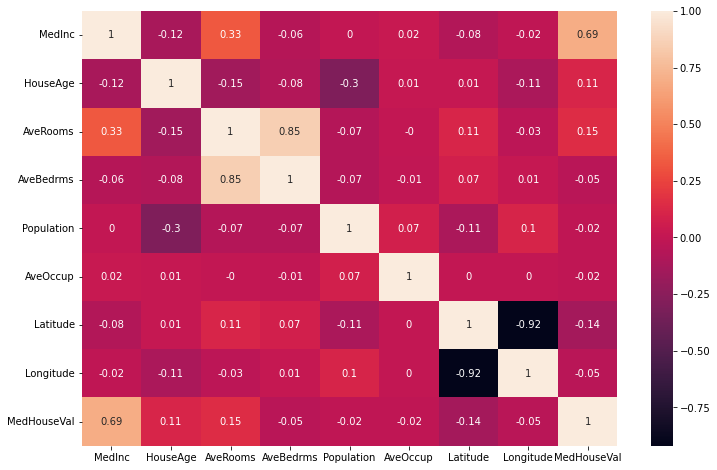

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().round(2), annot=True);

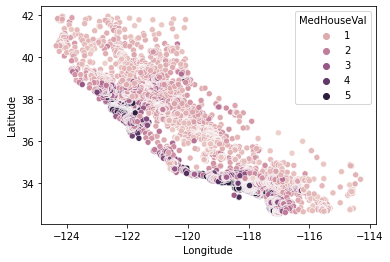

In [9]:
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='MedHouseVal');

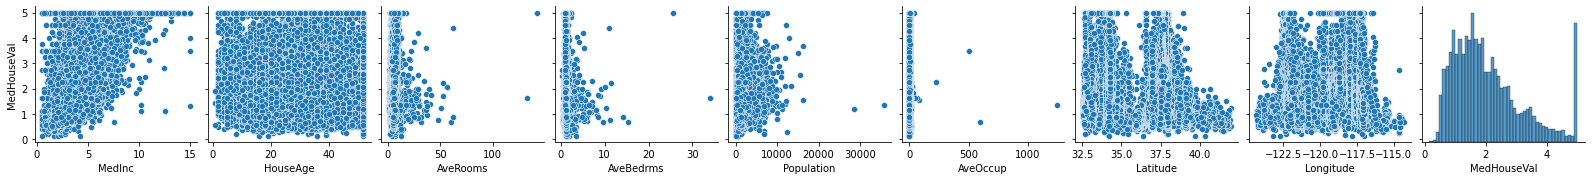

In [10]:
sns.pairplot(df, y_vars='MedHouseVal');

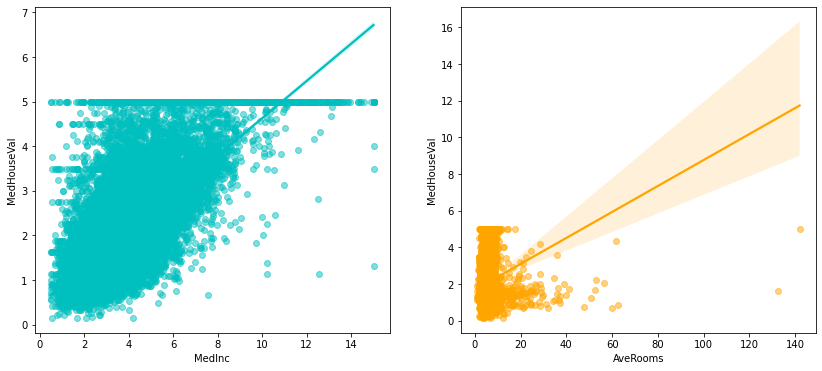

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6))
sns.regplot(x='MedInc', y='MedHouseVal', data=df, ax=ax1, color='c', scatter_kws={'alpha':0.5})
sns.regplot(x='AveRooms', y='MedHouseVal', data=df, ax=ax2, color='orange', scatter_kws={'alpha':0.5});

## Préparation des différents datasets

Créer les différents jeux de données pour la modélisation : X, y puis X_train, X_test, y_train, y_test 

In [12]:
from sklearn.model_selection import train_test_split
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


## Une forêt aléatoire

Caler une forêt aléatoire sur l'échantillon d'entraînement.

In [30]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

Comment récupérer le nombre d'arbres ? Comment récupérer les arbres eux-mêmes ?

In [14]:
# nombre d'arbres
rfr.n_estimators

100

In [15]:
# récupérer les arbres
rfr.estimators_

[DecisionTreeRegressor(max_features='auto', random_state=553615467),
 DecisionTreeRegressor(max_features='auto', random_state=120332215),
 DecisionTreeRegressor(max_features='auto', random_state=1831771680),
 DecisionTreeRegressor(max_features='auto', random_state=1358092452),
 DecisionTreeRegressor(max_features='auto', random_state=1316076748),
 DecisionTreeRegressor(max_features='auto', random_state=1296598832),
 DecisionTreeRegressor(max_features='auto', random_state=1161336502),
 DecisionTreeRegressor(max_features='auto', random_state=1884087077),
 DecisionTreeRegressor(max_features='auto', random_state=646687632),
 DecisionTreeRegressor(max_features='auto', random_state=752813408),
 DecisionTreeRegressor(max_features='auto', random_state=1653649943),
 DecisionTreeRegressor(max_features='auto', random_state=381576676),
 DecisionTreeRegressor(max_features='auto', random_state=1750834402),
 DecisionTreeRegressor(max_features='auto', random_state=2096519105),
 DecisionTreeRegressor(ma

Calculer le score du modèle. Choisir bien sûr une mesure adaptée à notre problème.

In [23]:
# calcul du score
rfr.score(X_test,y_test)

0.8076341702191633

In [31]:
# calculer le score à la main
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
y_pred = rfr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

r2, mse, rmse

(0.8116311985206838, 0.25382801275499656, 0.5038134702000301)

## Moyenne des prédictions des arbres

Vérifier que la forêt retourne bien la moyenne des prédictions des différents arbres en calculant cette moyenne "à la main". On pourra vérifier que le score du modèle est le même pour s'assurer qu'on obtient bien les mêmes prédictions.

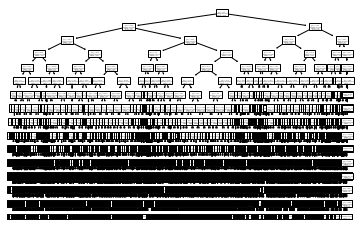

In [25]:
#pour afficher un arbre on est obligé de limité la profondeur maximal des arbres
from sklearn.ensemble import RandomForestRegressor
rfr2 = RandomForestRegressor(max_depth=15)
rfr2.fit(X_train, y_train)

from sklearn import tree
tree.plot_tree(rfr2.estimators_[10]);

In [29]:
# pour max_depth =15 on obtient un arbre maximal de 2**15 noeuds
sum([2**k for k in range(1, 16)])

65534

In [32]:
arbres = []
for tree in rfr.estimators_:
    arbres.append(tree.predict(X_test))

y_moyenne = np.mean(arbres, axis=0)
r2_score(y_test, y_moyenne)

0.8116311985206838

## Pondération des arbres à l'aide d'une régression linéaire

La forêt aléatoire est une façon de créer de nouvelles variables, autant de variables que d'arbres dans la forêt. On peut donc utiliser ces nouveaux features pour caler une régression linéaire. À vous de jouer !

In [39]:
# création du nouveau X_train avec les nouveaux features que sont les arbres de la forêt
def new_features(foret, X):
    arbres = []
    for arb in foret.estimators_ :
        arbres.append(arb.predict(X))
    return np.array(arbres).T

X_train_2 = new_features(rfr, X_train)

In [40]:
# on fit une régression linéaire sur ces nouveaux features
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_2, y_train)

LinearRegression()

Calculer le score de ce nouveau modèle.

In [41]:
X_test_2 = new_features(rfr, X_test)
r2_score(y_test, lr.predict(X_test_2))

0.8116933607109087

Répeter plusieurs fois les opérations précédentes afin de voir l'effet de l'aléatoire (notamment présent dans le découpage `train_test_split` et dans le `RandomForestRegressor`). Idéalement vous pouvez définir une fonction qui refait tout et l'exécuter directement.  
Qu'en conclure sur ce nouveau modèle ? Que dire du risque d'*overfitting* ?

Effectuer un diagrammes en barres des valeurs des coefficients de la régresion linéaire.

Caler une régression linéaire sur les variables initiales et mesurer son score pour comparer avec celui obtenu sur les features issus de la forêt aléatoire.

## Pour aller plus loin : sélection de variables

Une idée pour sélectionner les variables est d'utiliser la régularisation. On a vu que la régularisation $l_1$ ou encore [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) permet de sélectionner des variables en fixant certains coefficients à 0. On peut donc tenter d'améliorer la régression précédente en utilisant une régression Lasso pour réduire la forêt aléatoire sans perdre en performance. C'est quasiment le même code. À vous !

Regarder les coefficients pour savoir quels arbres ont finalement été conservés ou non (ou plutôt combien d'arbres ont été conservés).

Faire varier le paramètre `alpha` de la régression Lasso :
- avec un pas de 0.01 entre 0 et 1
- avec un pas de 0.1 entre 1 et 10

Puis tracer l'évolution de la performance et du nombre d'arbres conservés en fonction de alpha. 